In [1]:
%reload_ext pidgin

During the research process; developers of `uarray` `object`s may require multiple views to understand the their equations.

In [104]:
    import uarray
    from uarray import *

The `expression` created by the following example with __2__ abstract dimensions `A and B` has many potential views.    

In [106]:
    A, B = AbstractWithDimension(3, "A"), AbstractWithDimension(3, "B")    

`__expression__` is a generator function for the sample equation.  The value `expression` is immutable; when reductions are applied to the `object`
the state changes.  `__expression__` will let us recreate the same representation mulitple times.

In [111]:
    __expression__ = lambda: InnerProduct(
        Index(vector(1, 0), A),
        ScalarAccessor(Add),
        ScalarAccessor(Multiply),
        Index(
            vector(2),
            OuterProduct(
                Index(vector(1, 0), A),
                ScalarAccessor(Multiply),
                Index(vector(0, 1), B),
            ),
        ),
    ); expression = __expression__(); __import__('pprint').pprint(expression)

InnerProduct(Index(Array(ScalarAccessor('2'),
                         VectorAccessor(ScalarAccessor('1'),
                                        ScalarAccessor('0'))),
                   AbstractWithDimension('3', variable_name=A)),
             ScalarAccessor("Add['+', Arity(min_count=2, fixed_size=True), infix]"),
             ScalarAccessor("Multiply['*', Arity(min_count=2, fixed_size=True), infix]"),
             Index(Array(ScalarAccessor('1'),
                         VectorAccessor(ScalarAccessor('2'))),
                   OuterProduct(Index(Array(ScalarAccessor('2'),
                                            VectorAccessor(ScalarAccessor('1'),
                                                           ScalarAccessor('0'))),
                                      AbstractWithDimension('3', variable_name=A)),
                                ScalarAccessor("Multiply['*', Arity(min_count=2, fixed_size=True), infix]"),
                                Index(Array(ScalarAccessor('2

In [112]:
    import vdom

In [122]:
        """Out of the 📦, an __{{type(expression).__name__}}__ `object` already has a few representations.

    * `str` representation

    <code>{{str(expression)}}</code>

    * `pprint and repr` format

            import pprint

    {{vdom.pre(vdom.code(pprint.pformat(expression)))}}"""

Out of the 📦, an __{{type(expression).__name__}}__ `object` already has a few representations.

* `str` representation

<code>{{str(expression)}}</code>

* `pprint and repr` format

    import pprint

{{vdom.pre(vdom.code(pprint.pformat(expression)))}}

Beyond the default representation of the `expression` there are intermediate `reductions` that a researcher may choose to view.

In [123]:
    expression, reductions = __expression__(), []
    while True:
        reductions.append(replace(expression, 1))
        if reductions[-1] == expression: break
        else: expression = reductions[-1]

In [124]:
    """For `expression` there are __{{len(reductions)}}__ `reductions` or intermediates to consider."""

For `expression` there are __{{len(reductions)}}__ `reductions` or intermediates to consider.

One thing we can know is that a widget that compares two states of a reduction is needed.  The view representations should be flexible.

In [125]:
    import ipywidgets

The `extent` will define the `reductions` we are comparing.

In [127]:
    extent = ipywidgets.IntRangeSlider(min=0, max=len(reductions)-1)

`a and b` will be reductions that we can develop concepts with.

In [128]:
    a, b = map(reductions.__getitem__, extent.value)

As an example we could use `difflib` to comparse iterables.    

In [130]:
    import difflib

In [131]:
    """A representation may use the `difflib.unified_diff` function with the `pprint.pprint` `expression` wrapper.

    {{vdom.pre(vdom.code(''.join(difflib.unified_diff(pprint.pformat(a, 2).splitlines(True), pprint.pformat(b, 2).splitlines(True)))))}}"""

A representation may use the `difflib.unified_diff` function with the `pprint.pprint` `expression` wrapper.

{{vdom.pre(vdom.code(''.join(difflib.unified_diff(pprint.pformat(a, 2).splitlines(True), pprint.pformat(b, 2).splitlines(True)))))}}

As an example we could use `difflib` to comparse iterables.        

In [28]:
    import difflib

In [133]:
    """A representation may use the `difflib.unified_diff` function with the `pprint.pprint` `expression` wrapper.
    
    {{vdom.pre(vdom.code(''.join(difflib.context_diff(pprint.pformat(a, 2).splitlines(True), pprint.pformat(b, 2).splitlines(True)))))}}"""

A representation may use the `difflib.unified_diff` function with the `pprint.pprint` `expression` wrapper.

{{vdom.pre(vdom.code(''.join(difflib.context_diff(pprint.pformat(a, 2).splitlines(True), pprint.pformat(b, 2).splitlines(True)))))}}

Our `ipywidgets` `object` needs to be flexible; it should permit hyper parameter `ipywidgets`.  As a default, it should have the
`extent` and two outputs.

In [134]:
    Α, Β = outputs = ipywidgets.Output(description='The 👈 reduction.'), ipywidgets.Output(description='The 👉 reduction.')

Additionally the author should be able to have a comparator view for the object.   The `difflib` views 
are examples of a `compare` `ipywidgets.Output`.

    compare = ipywidgets.Output()

In [136]:
    import traitlets, toolz.curried as toolz, typing as t, textwrap, abc, IPython; from dataclasses import dataclass, field

In [142]:
    import black

In [157]:
    @dataclass
    class Reduction(metaclass=Comparator):
        callables = {
            'context_diff': lambda a, b: vdom.pre(vdom.code(''.join(difflib.context_diff(
                pprint.pformat(a).splitlines(), pprint.pformat(b).splitlines()
            )))),
            'unified_diff': lambda a, b: vdom.pre(vdom.code(''.join(difflib.unified_diff(
                pprint.pformat(a).splitlines(), pprint.pformat(b).splitlines()
            )))),
        }
        A: ipywidgets.IntRangeSlider = ipywidgets.IntSlider(description='👈')
        B: ipywidgets.IntRangeSlider = ipywidgets.IntSlider(description='👉')
        comparators: ipywidgets.Dropdown = ipywidgets.Dropdown()
        outputs: t.Tuple[ipywidgets.Output, ipywidgets.Output] = outputs
        compare: ipywidgets.Output = compare

        reductions: list = field(default_factory=lambda:reductions)
            
        def __post_init__(self):
            self.A.value = len(self.reductions)//4
            self.B.value = 3*len(self.reductions)//4
            self.A.observe(self.show_reduction_A)
            self.B.observe(self.show_reduction_B)
            self.comparators.options = list(self.callables)
            self.comparators.observe(self.show_compare, 'value')
            
        def show_compare(self, change=None):
            self.compare.clear_output()
            with self.compare:
                IPython.display.display(self.callables[self.comparators.value](self.a, self.b))
            
            
        @property
        def a(self): return self.reductions[self.A.value]
        
        @property
        def b(self): return self.reductions[self.B.value]
            
        def show_reduction_A(self, change):
            outputs[0].clear_output()
            with outputs[0]: 
                IPython.display.display(vdom.pre(vdom.code(black.format_str(pprint.pformat(self.a), 50))))
                
            self.show_compare()
        def show_reduction_B(self, change):
            outputs[1].clear_output() 
            with outputs[1]: 
                IPython.display.display(vdom.pre(vdom.code(black.format_str(pprint.pformat(self.b), 50))))
            self.show_compare()
        
        def _ipython_display_(self) -> IPython.display:
            IPython.display.display(ipywidgets.HBox(children=[self.A, self.B]))
            accordion = ipywidgets.Accordion(children=[
                ipywidgets.HBox(self.outputs), ipywidgets.VBox(children=[self.comparators, self.compare])
            ])
            accordion.set_title(0, 'Side by side')
            accordion.set_title(1, 'Comparison')
            IPython.display.display(accordion)

In [158]:
    Reduction()

Accordion(children=(HBox(children=(Output(outputs=({'output_type': 'display_data', 'data': {'application/vdom.…

In [101]:
def recurse(expression, row=0, col=0, parent=None):
    operands = getattr(expression, "operands", None)
    if operands:
        for col, operand in enumerate(expression.operands):
            yield from recurse(
                operand, row + 1, col, expression
            )
    else:
        yield {
            "expression": expression,
            "parent": parent,
            "row": row,
            "col": col,
        }

def recurse(expression, row=0, col=0, parent=None):
    operands = getattr(expression, "operands", None)
    if operands:
        for col, operand in enumerate(expression.operands):
            yield from recurse(
                operand, row + 1, col, expression
            )
    else:
        yield {
            "expression": expression,
            "parent": parent,
            "row": row,
            "col": col,
        }

In [2]:
import difflib

reductions[0], reductions[1]

In [3]:
def diffcodes(a, b):
    diffs = list(difflib.SequenceMatcher(a=a, b=b).get_grouped_opcodes())
    return diffs and diffs[0]

In [4]:
import vdom

In [5]:
import black

In [6]:
FORMAT = lambda x: pprint.pformat(x[0] if isinstance(x, list) else str)
INSERT = lambda left, *right: vdom.create_component('ins')(EQUAL(left))
DELETE = lambda left, *right: vdom.create_component('del')(EQUAL(left))
EQUAL = lambda left, *right: FORMAT(left)
REPLACE = lambda left, right: vdom.code(INSERT(left), vdom.code(DELETE(right)))

In [25]:
a, b = reductions[11], reductions[12]

In [27]:
w=5
print(''.join(difflib.context_diff(pprint.pformat(a, width=w).splitlines(True), pprint.pformat(b, width=w).splitlines(True))))

*** 
--- 
***************
*** 1,11 ****
  InnerProduct(Array(Content(Get(ScalarAccessor('2'),
                                 UnboundAccessor('', variable_name=A_shape))),
!                    GetBySubstituting(ScalarAccessor("'idx_2'"),
!                                      Array(NoLengthAccessor(),
!                                            Content(Get(UnboundAccessor('', variable_name=idx_2),
!                                                        Content(Get(ScalarAccessor('0'),
!                                                                    Content(Get(ScalarAccessor('1'),
!                                                                                UnboundAccessor('', variable_name=A_content)))))))))),
               ScalarAccessor("Add['+', Arity(min_count=2, fixed_size=True), infix]"),
               ScalarAccessor("Multiply['*', Arity(min_count=2, fixed_size=True), infix]"),
               Index(Array(ScalarAccessor('1'),
--- 1,9 ----
  InnerProduct(Array(Content(

pprint??

In [ ]:
import difflib

In [79]:
import pprint

In [81]:
children = []
a, b = reductions[10], reductions[30]
if all(hasattr(object, 'operands') for object in [a, b]):
    a, b = reductions[10].operands, reductions[30].operands
    for code, *positions in Δ:
        left, right = slice(*positions[:2]), slice(*positions[2:])
        children.append(getattr(__import__(__name__), code.upper())(a[left], b[right]))

vdom.pre(vdom.code(*children))

<pre><code><code><ins>Get(ScalarAccessor(&#x27;0&#x27;),
    GetBySubstituting(ScalarAccessor(&quot;&#x27;idx_11&#x27;&quot;),
                      Array(Content(Get(ScalarAccessor(&#x27;2&#x27;),
                                        UnboundAccessor(&#x27;&#x27;, variable_name=A_shape))),
                            GetBySubstituting(ScalarAccessor(&quot;&#x27;idx_12&#x27;&quot;),
                                              Array(NoLengthAccessor(),
                                                    Content(Get(UnboundAccessor(&#x27;&#x27;, variable_name=idx_12),
                                                                Content(Get(UnboundAccessor(&#x27;&#x27;, variable_name=idx_11),
                                                                            Content(Get(ScalarAccessor(&#x27;1&#x27;),
                                                                                        UnboundAccessor(&#x27;&#x27;, variable_name=A_content))))))))))))</ins><code><del>Array(Content(Get(ScalarAccessor(&#x27;2&#x27;),
                  UnboundAccessor(&#x27;&#x27;, variable_name=A_shape))),
      ForwardGetAccessor(Array(NoLengthAccessor(),
                               Content(Get(ScalarAccessor(&#x27;0&#x27;),
                                           Content(Get(ScalarAccessor(&#x27;1&#x27;),
                                                       UnboundAccessor(&#x27;&#x27;, variable_name=A_content))))))))</del></code></code>ScalarAccessor(&quot;Add[&#x27;+&#x27;, Arity(min_count=2, fixed_size=True), infix]&quot;)<code><ins>Index(Array(ScalarAccessor(&#x27;1&#x27;), VectorAccessor(ScalarAccessor(&#x27;2&#x27;))),
      OuterProduct(Index(Array(ScalarAccessor(&#x27;2&#x27;),
                               VectorAccessor(ScalarAccessor(&#x27;1&#x27;),
                                              ScalarAccessor(&#x27;0&#x27;))),
                         AbstractWithDimension(&#x27;3&#x27;, variable_name=A)),
                   ScalarAccessor(&quot;Multiply[&#x27;*&#x27;, Arity(min_count=2, fixed_size=True), infix]&quot;),
                   Index(Array(ScalarAccessor(&#x27;2&#x27;),
                               VectorAccessor(ScalarAccessor(&#x27;0&#x27;),
                                              ScalarAccessor(&#x27;1&#x27;))),
                         AbstractWithDimension(&#x27;3&#x27;, variable_name=B))))</ins><code><del>Get(ScalarAccessor(&#x27;2&#x27;),
    Content(OuterProduct(Array(Content(Get(ScalarAccessor(&#x27;2&#x27;),
                                           UnboundAccessor(&#x27;&#x27;, variable_name=A_shape))),
                               ForwardGetAccessor(Array(NoLengthAccessor(),
                                                        Content(Get(ScalarAccessor(&#x27;0&#x27;),
                                                                    Content(Get(ScalarAccessor(&#x27;1&#x27;),
                                                                                UnboundAccessor(&#x27;&#x27;, variable_name=A_content)))))))),
                         ScalarAccessor(&quot;Multiply[&#x27;*&#x27;, Arity(min_count=2, fixed_size=True), infix]&quot;),
                         Get(Content(Get(ScalarAccessor(&#x27;1&#x27;),
                                         VectorAccessor(ScalarAccessor(&#x27;0&#x27;),
                                                        ScalarAccessor(&#x27;1&#x27;)))),
                             Content(Get(Content(Get(ScalarAccessor(&#x27;0&#x27;),
                                                     VectorAccessor(ScalarAccessor(&#x27;0&#x27;),
                                                                    ScalarAccessor(&#x27;1&#x27;)))),
                                         Content(AbstractWithDimension(&#x27;3&#x27;, variable_name=B))))))))</del></code></code></code></pre>

In [81]:
children = []
a, b = reductions[10], reductions[30]
if all(hasattr(object, 'operands') for object in [a, b]):
    a, b = reductions[10].operands, reductions[30].operands
    for code, *positions in Δ:
        left, right = slice(*positions[:2]), slice(*positions[2:])
        children.append(getattr(__import__(__name__), code.upper())(a[left], b[right]))

a, b = a[left][0], b[right][0]
vdom.pre(vdom.code(*children))

<pre><code><code><ins>Get(ScalarAccessor(&#x27;0&#x27;),
    GetBySubstituting(ScalarAccessor(&quot;&#x27;idx_11&#x27;&quot;),
                      Array(Content(Get(ScalarAccessor(&#x27;2&#x27;),
                                        UnboundAccessor(&#x27;&#x27;, variable_name=A_shape))),
                            GetBySubstituting(ScalarAccessor(&quot;&#x27;idx_12&#x27;&quot;),
                                              Array(NoLengthAccessor(),
                                                    Content(Get(UnboundAccessor(&#x27;&#x27;, variable_name=idx_12),
                                                                Content(Get(UnboundAccessor(&#x27;&#x27;, variable_name=idx_11),
                                                                            Content(Get(ScalarAccessor(&#x27;1&#x27;),
                                                                                        UnboundAccessor(&#x27;&#x27;, variable_name=A_content))))))))))))</ins><code><del>Array(Content(Get(ScalarAccessor(&#x27;2&#x27;),
                  UnboundAccessor(&#x27;&#x27;, variable_name=A_shape))),
      ForwardGetAccessor(Array(NoLengthAccessor(),
                               Content(Get(ScalarAccessor(&#x27;0&#x27;),
                                           Content(Get(ScalarAccessor(&#x27;1&#x27;),
                                                       UnboundAccessor(&#x27;&#x27;, variable_name=A_content))))))))</del></code></code>ScalarAccessor(&quot;Add[&#x27;+&#x27;, Arity(min_count=2, fixed_size=True), infix]&quot;)<code><ins>Index(Array(ScalarAccessor(&#x27;1&#x27;), VectorAccessor(ScalarAccessor(&#x27;2&#x27;))),
      OuterProduct(Index(Array(ScalarAccessor(&#x27;2&#x27;),
                               VectorAccessor(ScalarAccessor(&#x27;1&#x27;),
                                              ScalarAccessor(&#x27;0&#x27;))),
                         AbstractWithDimension(&#x27;3&#x27;, variable_name=A)),
                   ScalarAccessor(&quot;Multiply[&#x27;*&#x27;, Arity(min_count=2, fixed_size=True), infix]&quot;),
                   Index(Array(ScalarAccessor(&#x27;2&#x27;),
                               VectorAccessor(ScalarAccessor(&#x27;0&#x27;),
                                              ScalarAccessor(&#x27;1&#x27;))),
                         AbstractWithDimension(&#x27;3&#x27;, variable_name=B))))</ins><code><del>Get(ScalarAccessor(&#x27;2&#x27;),
    Content(OuterProduct(Array(Content(Get(ScalarAccessor(&#x27;2&#x27;),
                                           UnboundAccessor(&#x27;&#x27;, variable_name=A_shape))),
                               ForwardGetAccessor(Array(NoLengthAccessor(),
                                                        Content(Get(ScalarAccessor(&#x27;0&#x27;),
                                                                    Content(Get(ScalarAccessor(&#x27;1&#x27;),
                                                                                UnboundAccessor(&#x27;&#x27;, variable_name=A_content)))))))),
                         ScalarAccessor(&quot;Multiply[&#x27;*&#x27;, Arity(min_count=2, fixed_size=True), infix]&quot;),
                         Get(Content(Get(ScalarAccessor(&#x27;1&#x27;),
                                         VectorAccessor(ScalarAccessor(&#x27;0&#x27;),
                                                        ScalarAccessor(&#x27;1&#x27;)))),
                             Content(Get(Content(Get(ScalarAccessor(&#x27;0&#x27;),
                                                     VectorAccessor(ScalarAccessor(&#x27;0&#x27;),
                                                                    ScalarAccessor(&#x27;1&#x27;)))),
                                         Content(AbstractWithDimension(&#x27;3&#x27;, variable_name=B))))))))</del></code></code></code></pre>

In [145]:
import jsondiff

ModuleNotFoundError: No module named 'jsondiff'

In [ ]:
`

In [143]:
FORMAT = lambda x: pprint.pformat(x)
INSERT = lambda left, right: vdom.create_component('ins')(EQUAL(left))
DELETE = lambda left, right: vdom.create_component('del')(REPLACE(left, right))
EQUAL = lambda left, *right: FORMAT(left)
REPLACE = lambda left, right: vdom.code(INSERT(left), vdom.code(DELETE(right)))

In [138]:
def diffcodes(a, b):
    diffs = list(difflib.SequenceMatcher(a=a, b=b).get_grouped_opcodes())
    return diffs and diffs[0]

In [142]:
def REPLACE(a, b):
    children = []
    if all(hasattr(object, 'operands') for object in [a, b]):
        a, b = a.operands, b.operands
        Δ = diffcodes(a, b)
        for code, *positions in Δ:
            left, right = slice(*positions[:2]), slice(*positions[2:])
            left, right = a[left], b[right]
            vdom.code(INSERT(left), vdom.code(DELETE(right)))
            children.append(
                getattr(__import__(__name__), code.upper())(a, b)
            )
            if code == 'replace':
    return vdom.code(*children)

vdom.pre(COMPARE(reductions[11], reductions[12]))

<pre><code><code><ins>[Array(Content(Get(ScalarAccessor(&#x27;2&#x27;),
                   UnboundAccessor(&#x27;&#x27;, variable_name=A_shape))),
       GetBySubstituting(ScalarAccessor(&quot;&#x27;idx_12&#x27;&quot;),
                         Array(NoLengthAccessor(),
                               Content(Get(UnboundAccessor(&#x27;&#x27;, variable_name=idx_12),
                                           Content(Get(ScalarAccessor(&#x27;0&#x27;),
                                                       Content(Get(ScalarAccessor(&#x27;1&#x27;),
                                                                   UnboundAccessor(&#x27;&#x27;, variable_name=A_content))))))))))]</ins><code><del>[Array(Content(Get(ScalarAccessor(&#x27;2&#x27;),
                   UnboundAccessor(&#x27;&#x27;, variable_name=A_shape))),
       ForwardGetAccessor(Array(NoLengthAccessor(),
                                Content(Get(ScalarAccessor(&#x27;0&#x27;),
                                            Content(Get(ScalarAccessor(&#x27;1&#x27;),
                                                        UnboundAccessor(&#x27;&#x27;, variable_name=A_content))))))))]</del></code></code>[]</code></pre>

In [140]:
reductions[30]

InnerProduct(Array(Content(Get(ScalarAccessor('2'), UnboundAccessor('', variable_name=A_shape))), ForwardGetAccessor(Array(NoLengthAccessor(), Content(Get(ScalarAccessor('0'), Content(Get(ScalarAccessor('1'), UnboundAccessor('', variable_name=A_content)))))))), ScalarAccessor("Add['+', Arity(min_count=2, fixed_size=True), infix]"), ScalarAccessor("Multiply['*', Arity(min_count=2, fixed_size=True), infix]"), Get(ScalarAccessor('2'), Content(OuterProduct(Array(Content(Get(ScalarAccessor('2'), UnboundAccessor('', variable_name=A_shape))), ForwardGetAccessor(Array(NoLengthAccessor(), Content(Get(ScalarAccessor('0'), Content(Get(ScalarAccessor('1'), UnboundAccessor('', variable_name=A_content)))))))), ScalarAccessor("Multiply['*', Arity(min_count=2, fixed_size=True), infix]"), Get(Content(Get(ScalarAccessor('1'), VectorAccessor(ScalarAccessor('0'), ScalarAccessor('1')))), Content(Get(Content(Get(ScalarAccessor('0'), VectorAccessor(ScalarAccessor('0'), ScalarAccessor('1')))), Content(Abstrac

In [34]:
@dataclass
class DiffFormatter:
    repr = staticmethod(str)
    a: None = reductions[0]
    b: None = reductions[16]
        
    def replace(self, left, right):
        a, b = getattr(self.a, 'operands', None), getattr(self.b, 'operands', None)
        if a and b:
            return DiffFormatter(a[left][0], b[right][0])()
        return vdom.code(delete(self.a), ins(self.b))
    def delete(self, left, right):
        # The object should be formatted as deleted.
        return delete(self.repr(self.a.operands[left]))
    def insert(self, left, right):
        # The object should be formatted as inserted.
        return ins(self.repr(self.a.operands[left]))
    def equal(self, left, right):
        # The object should be formatted as normal code text
        return self.repr(self.a.operands[left])
    
    def __call__(self):
        children = []
        a, b = getattr(self.a, 'operands', None), getattr(self.b, 'operands', None)
        if a and b:
            for code, *slices in diffcodes(self.a.operands, self.b.operands):
                children.append(getattr(self, code)(
                    slice(*slices[:2]), slice(*slices[2:])))
            return vdom.code(children)
        return vdom.code(delete(self.a), ins(self.b))

In [35]:
DiffFormatter()()

ValueError: Children must be a list of VDOM objects or strings

In [ ]:
@dataclass
class FormatDiff:
    a: None
    b: None
    def compare(self, a=None, b=None, body=None):
        body = body or vdom.code()
        a, b = (a or self.a).operands, (b or self.b).operands
        codes = diffcodes(a, b)
        for code, *slices in codes:
            ...

In [81]:
codes = diffcodes(a[left][0].operands[left][0].operands[left][0].operands, b[right][0].operands[right][0].operands[right][0].operands)
for code, *slices in codes:
    left, right = slice(*slices[:2]), slice(*slices[2:])
    if code == 'replace': 
        break
    if code == 'delete': ...
    if code == 'insert': ...

In [82]:
codes

[('replace', 0, 2, 0, 2)]

In [42]:
s = difflib.SequenceMatcher(a=reductions[0].operands, b=reductions[16].operands)

list(s.get_grouped_opcodes())

[[('replace', 0, 1, 0, 1), ('equal', 1, 3, 1, 3), ('replace', 3, 4, 3, 4)]]

In [45]:
reductions[0].operands[0], reductions[16].operands[-1]

(Get(Content(Get(ScalarAccessor('1'), VectorAccessor(ScalarAccessor('1'), ScalarAccessor('0')))), Content(Get(Content(Get(ScalarAccessor('0'), VectorAccessor(ScalarAccessor('1'), ScalarAccessor('0')))), Content(AbstractWithDimension('3', variable_name=A))))),
 Get(ScalarAccessor('2'), Content(OuterProduct(Index(Array(ScalarAccessor('2'), VectorAccessor(ScalarAccessor('1'), ScalarAccessor('0'))), AbstractWithDimension('3', variable_name=A)), ScalarAccessor("Multiply['*', Arity(min_count=2, fixed_size=True), infix]"), Index(Array(ScalarAccessor('2'), VectorAccessor(ScalarAccessor('0'), ScalarAccessor('1'))), AbstractWithDimension('3', variable_name=B))))))

In [2]:
reductions

[InnerProduct(Get(Content(Get(ScalarAccessor('1'), VectorAccessor(ScalarAccessor('1'), ScalarAccessor('0')))), Content(Get(Content(Get(ScalarAccessor('0'), VectorAccessor(ScalarAccessor('1'), ScalarAccessor('0')))), Content(AbstractWithDimension('3', variable_name=A))))), ScalarAccessor("Add['+', Arity(min_count=2, fixed_size=True), infix]"), ScalarAccessor("Multiply['*', Arity(min_count=2, fixed_size=True), infix]"), Index(Array(ScalarAccessor('1'), VectorAccessor(ScalarAccessor('2'))), OuterProduct(Index(Array(ScalarAccessor('2'), VectorAccessor(ScalarAccessor('1'), ScalarAccessor('0'))), AbstractWithDimension('3', variable_name=A)), ScalarAccessor("Multiply['*', Arity(min_count=2, fixed_size=True), infix]"), Index(Array(ScalarAccessor('2'), VectorAccessor(ScalarAccessor('0'), ScalarAccessor('1'))), AbstractWithDimension('3', variable_name=B))))),
 InnerProduct(Get(Content(Array(NoLengthAccessor(), VectorAccessorGet(ScalarAccessor('1'), ScalarAccessor('1'), ScalarAccessor('0')))), Co

# A widget to introspect the uarray reductions

In [2]:
import ipywidgets, traitlets, pprint

widget= ipywidgets.VBox([
    ipywidgets.IntSlider(min=0, max=len(reductions)-1),
    ipywidgets.Dropdown(description='repr', options=['pprint', 'str', 'repr']),
    ipywidgets.HBox([
        ipywidgets.VBox([
            ipywidgets.HTML(value="<h1>Current</h1>"),
            ipywidgets.Output()
        ]),
        ipywidgets.VBox([
            ipywidgets.HTML(value="<h1>Previous</h1>"),
            ipywidgets.Output()
        ]),
    ]),
])
slider, view, outputs = widget.children
new, old = outputs.children[0].children[1], outputs.children[1].children[1]
views = {'pprint': pprint.pprint, 'str': lambda x: print(str(x)), 'repr': lambda x: print(repr(x))}

def show_reduction(*object):
    old.outputs = new.outputs
    new.clear_output()
    with new: 
        views[view.value](reductions[slider.value])

slider.observe(show_reduction, 'value')
show_reduction()

In [4]:
widget

# Some 🐼s fu

In [90]:
import pandas

df = pandas.concat({i: pandas.DataFrame(list(recurse(reduction))) for i, reduction in enumerate(reductions)})

df.expression.groupby(df.index.get_level_values(0)).value_counts().unstack(1).fillna(0)

In [20]:
A = pandas.DataFrame(
    df.expression[:, None] == df.expression[None, :],
    df.index, df.index
)

In [22]:
import matplotlib.pyplot

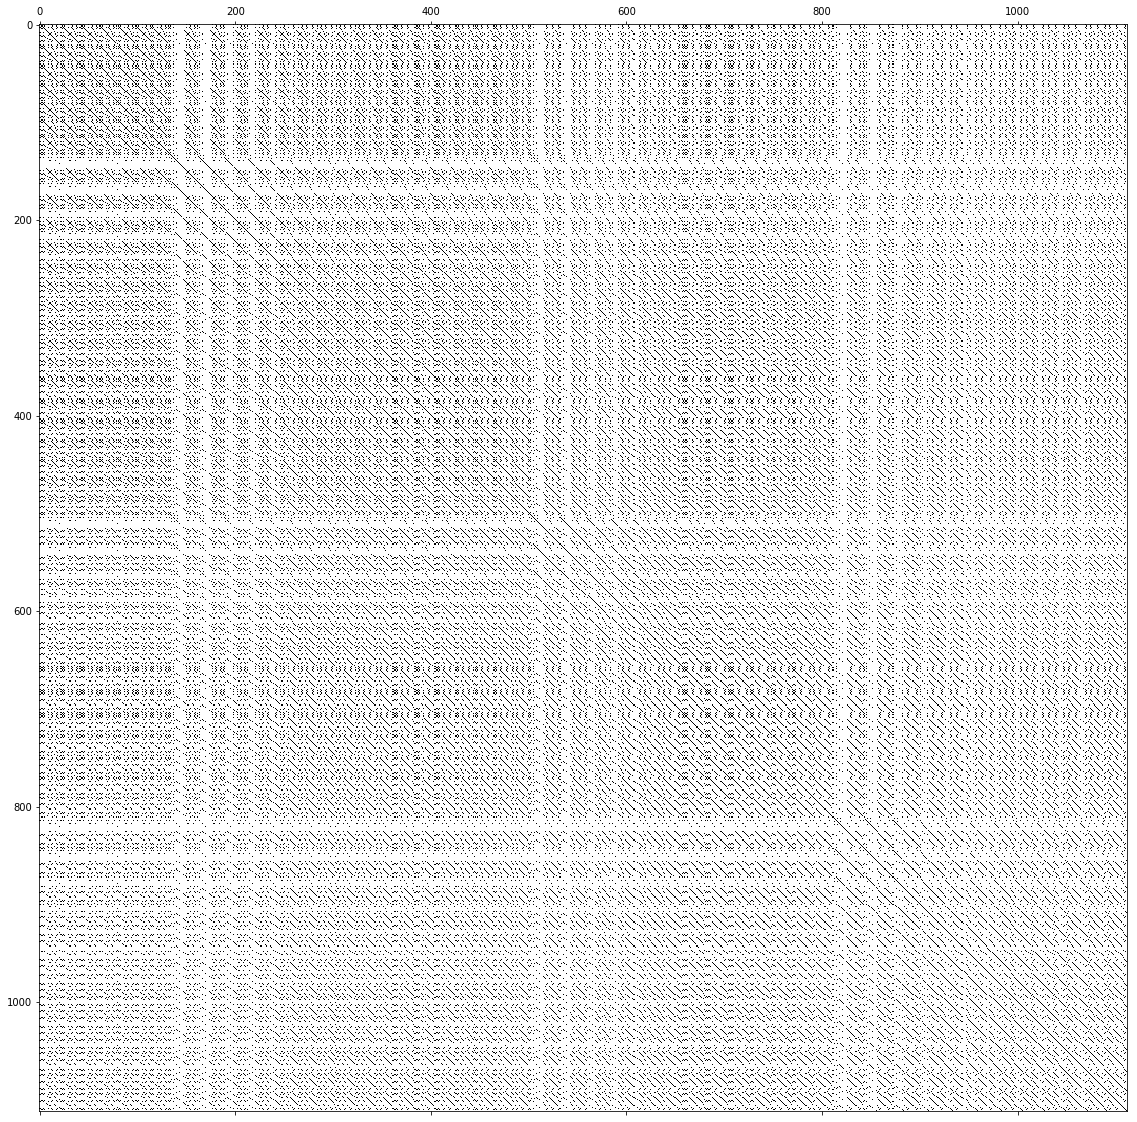

In [31]:
matplotlib.pyplot.spy(A)
matplotlib.pyplot.gcf().set_size_inches(20, 20)